In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import math

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from tensorflow.keras import metrics

In [2]:
trs = pd.read_csv("data/transactions.csv")
trs['date'] = pd.to_datetime(trs['date'])
trs_per_acc = trs.groupby('account_id')

In [3]:
acc = []
t = []
for i, k in trs_per_acc: 
    print(i, len(k))
    acc.append(i)
    t.append(len(k))
    
df = pd.DataFrame({'acc': acc, 'trs': t})

0 310
1 105
2 81
3 98
4 1041
5 15
6 144
7 668
8 761
9 118
10 1228
11 94
12 675
13 12
14 17
15 847
16 422
17 372
18 339
19 616
20 117
21 176
22 732
23 385
24 47
25 139
26 338
27 225
28 102
29 640
30 350
31 1351
32 175
33 316
34 28
35 853
36 149
37 1115
38 322
39 402
40 2052
41 442
42 218
43 242
44 485
45 1534
46 344
47 32
48 194
49 30
50 248
51 40
52 166
53 31
54 504
55 97
56 11
57 198
58 1170
59 606
60 208
61 1713
62 569
63 56
64 101
65 244
66 157
67 218
68 33
69 50
70 364
71 191
72 13
73 15
74 338
75 124
76 78
77 10
78 92
79 138
80 1308
81 180
82 147
83 37
84 463
85 594
86 269
87 83
88 68
89 91
90 119
91 150
92 502
93 430
94 968
95 52
96 349
97 187
98 13
99 185
100 470
101 274
102 16
103 621
104 46
105 100
106 483
107 229
108 11
109 1556
110 1017
111 135
112 401
113 96
114 49
115 7
116 310
117 77
118 1038
119 248
120 461
121 546
122 91
123 701
124 35
125 1
126 561
127 350
128 524
129 1174
130 148
131 561
132 46
133 173
134 46
135 158
136 144
137 178
138 221
139 860
140 246
141 982
142

1235 714
1236 61
1237 1243
1238 51
1239 135
1240 77
1241 620
1242 149
1243 825
1244 1245
1245 497
1246 344
1247 1096
1248 3388
1249 453
1250 493
1251 959
1252 679
1253 22


In [4]:
df = df.sort_values(by = ['trs'], ascending = False)

In [6]:
acc_685 = trs_per_acc.get_group(685)['amount'].values
acc_684 = trs_per_acc.get_group(684)['amount'].values
acc_606 = trs_per_acc.get_group(606)['amount'].values
print("lengths of acoounts transactions "+str(len(acc_606)), len(acc_685), len(acc_684))

lengths of acoounts transactions 1381 1381 1381


In [7]:
# define input sequence

series1 = acc_685.reshape((len(acc_685), 1))
series2 = acc_684.reshape((len(acc_684), 1))
series3 = acc_606.reshape((len(acc_606), 1))

# horizontally stack columns
dataset = np.hstack((series1, series2, series3 ))

In [9]:
dataset.shape

(1381, 3)

In [13]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
          break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [14]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 5

In [15]:
np.set_printoptions(suppress=True)
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

count = 0
for i in range(len(X)):
    count += 1
    print(X[i], y[i])
    if count > 2: break
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

[[   2.      2.   -250.  ]
 [  -1.2    -1.2   -16.  ]
 [ 100.    100.    -20.  ]
 [ 433.2   433.2   -18.85]
 [ -30.    -30.    -20.  ]
 [  -3.5    -3.5    -3.75]
 [  -0.08   -0.08   51.81]
 [ -35.3   -35.3   -37.15]
 [  -8.42   -8.42 -100.  ]
 [ -10.8   -10.8   -15.95]] [[  -4.4  -400.    -43.34]
 [  -5.     -4.4   -21.55]
 [ -14.4    -5.    -72.41]
 [ -20.72  -14.4    -4.9 ]
 [-400.    -20.72  -46.49]]
[[  -1.2    -1.2   -16.  ]
 [ 100.    100.    -20.  ]
 [ 433.2   433.2   -18.85]
 [ -30.    -30.    -20.  ]
 [  -3.5    -3.5    -3.75]
 [  -0.08   -0.08   51.81]
 [ -35.3   -35.3   -37.15]
 [  -8.42   -8.42 -100.  ]
 [ -10.8   -10.8   -15.95]
 [  -4.4  -400.    -43.34]] [[  -5.     -4.4   -21.55]
 [ -14.4    -5.    -72.41]
 [ -20.72  -14.4    -4.9 ]
 [-400.    -20.72  -46.49]
 [ 100.    100.     46.49]]
[[ 100.    100.    -20.  ]
 [ 433.2   433.2   -18.85]
 [ -30.    -30.    -20.  ]
 [  -3.5    -3.5    -3.75]
 [  -0.08   -0.08   51.81]
 [ -35.3   -35.3   -37.15]
 [  -8.42   -8.42 -100. 

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
# define model
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=n_input)) 
model.add(Dense(250, activation='relu', input_dim=n_input)) 
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse',  metrics=[metrics.mae])

# fit model
history = model.fit(train_X, train_y, epochs=100, verbose=2)

Epoch 1/100
35/35 - 1s - loss: 37865.4844 - mean_absolute_error: 71.5029
Epoch 2/100
35/35 - 0s - loss: 35421.2461 - mean_absolute_error: 67.7341
Epoch 3/100
35/35 - 0s - loss: 34416.3477 - mean_absolute_error: 67.7813
Epoch 4/100
35/35 - 0s - loss: 33620.4336 - mean_absolute_error: 68.5805
Epoch 5/100
35/35 - 0s - loss: 32877.9258 - mean_absolute_error: 68.8828
Epoch 6/100
35/35 - 0s - loss: 32053.3320 - mean_absolute_error: 68.6141
Epoch 7/100
35/35 - 0s - loss: 31499.1660 - mean_absolute_error: 69.3203
Epoch 8/100
35/35 - 0s - loss: 30732.5781 - mean_absolute_error: 69.5214
Epoch 9/100
35/35 - 0s - loss: 29991.5176 - mean_absolute_error: 69.1391
Epoch 10/100
35/35 - 0s - loss: 29317.1035 - mean_absolute_error: 68.2196
Epoch 11/100
35/35 - 0s - loss: 28785.0879 - mean_absolute_error: 69.2323
Epoch 12/100
35/35 - 0s - loss: 28256.4844 - mean_absolute_error: 68.4269
Epoch 13/100
35/35 - 0s - loss: 27632.4434 - mean_absolute_error: 68.4459
Epoch 14/100
35/35 - 0s - loss: 27084.7637 - me

In [24]:
# demonstrate prediction
x_input = np.array([[   2.  ,    2.  , -250.  ],
                    [  -1.2  ,  -1.2 ,  -16.  ],
                    [ 100.  ,  100.  ,  -20.  ],
                    [ 433.2 ,  433.2 ,  -18.85],
                    [ -30.  ,  -30.  ,  -20.  ],
                    [  -3.5 ,  -3.5  ,  -3.75],
                    [  -0.08 ,  -0.08 ,  51.81],
                    [ -35.3  , -35.3  , -37.15],
                    [  -8.42 ,  -8.42 ,-100.  ],
                    [ -10.8  , -10.8  , -15.95]] ) 
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[-111.23255  -214.56293   -14.25303    22.770987   71.35683   -24.634281
   -42.623768  -69.562416  -51.949425  -22.05835   -55.99271    19.1882
  -152.826    -101.29024  -139.83385 ]]


In [25]:
predicted = np.array([])
for i in range(len(test_X)):
    x_input = test_X[i].reshape((1, n_input))
    yhat = model.predict(x_input, verbose=0)
    #print(yhat[0])
    predicted = np.append(predicted, yhat[0])

print(len(test_y))
var4diff2 = len(test_y)
print('shape ',test_y.shape )
test_y = test_y.reshape((test_y.shape[0] * test_y.shape[1]))    
expected = test_y    
print(len(expected))
print(len(predicted))  

4110
shape  (4110,)


IndexError: tuple index out of range

Mean Absolute Error =  151.85895916494445


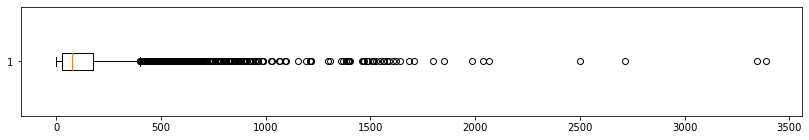

In [26]:
difference = abs(predicted - expected)
print('Mean Absolute Error = ', np.mean(difference))
plt.figure(figsize = (14,2))
plt.boxplot(difference, vert = False)
plt.show()